# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## dealing with missing data

In [5]:
#transfer object to numeric integer
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#create average of TotalCharge for filling the missing data
mean = np.mean(df.TotalCharges)
df.TotalCharges = df.TotalCharges.fillna(mean)

## check out the plot

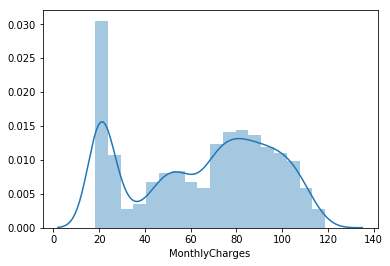

In [6]:
#distribution of the Monthly Charges
sns.distplot(df['MonthlyCharges'])

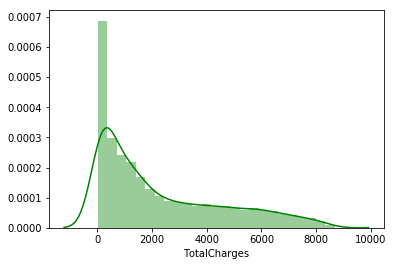

In [7]:
#distribution of the Total Charges
sns.distplot(df['TotalCharges'],color='green')

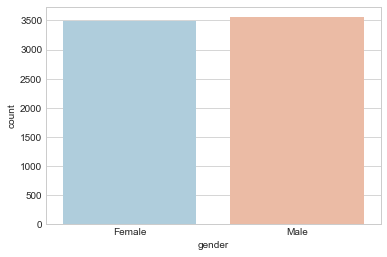

In [8]:
#compare the number of female and male
sns.set_style('whitegrid')
sns.countplot(x='gender',data=df,palette='RdBu_r')

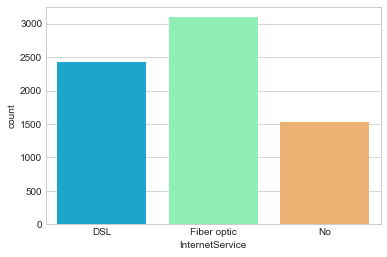

In [9]:
#check out the plot to see the preference of the user
sns.countplot(x='InternetService',data=df,palette='rainbow')

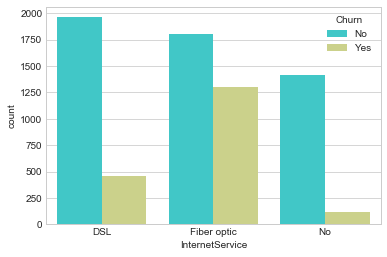

In [10]:
#What kind of customer tend to leave our service?
sns.countplot(x='InternetService',hue='Churn',data=df,palette='rainbow')

It shows that most of the customer will stay, but for customer who use fiber optic will tend to leave the service. In addition, we can observe that people who do not use Internet will tend to stay.

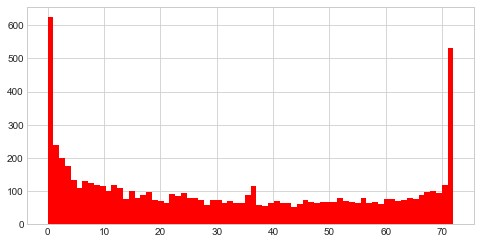

In [11]:
df['tenure'].hist(color='red',bins=70,figsize=(8,4))

From the survey, we have a lot of new customers and old customers.

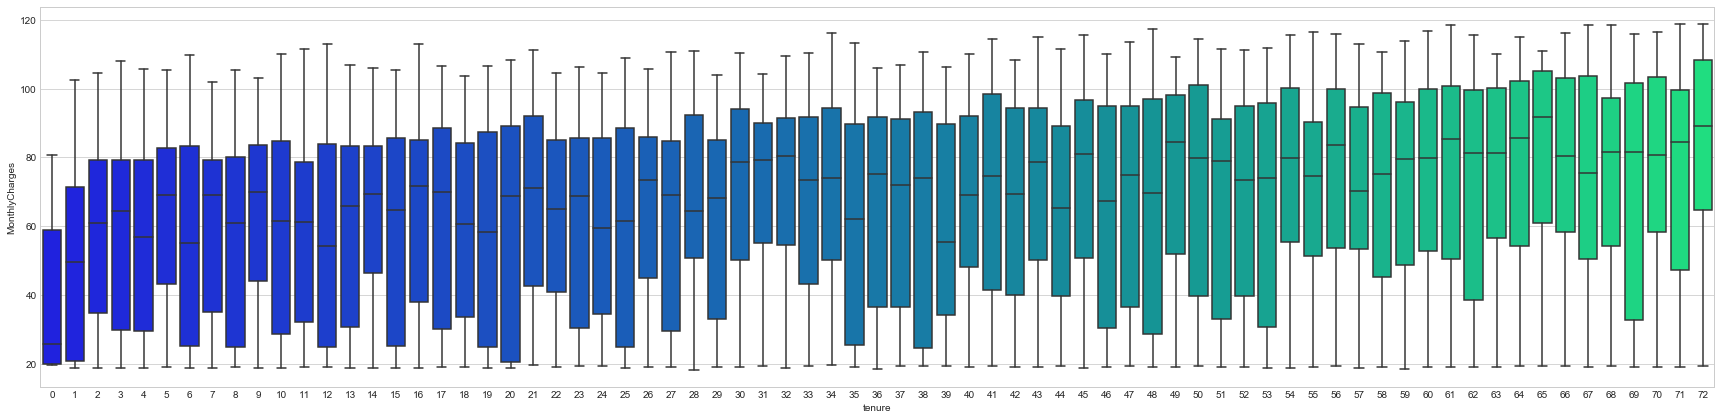

In [12]:
plt.figure(figsize=(30, 7))
sns.boxplot(x='tenure',y='MonthlyCharges',data=df,palette='winter')

I would like to know that will peolple who use our service for a long time spend much more money per month on our service?

# Cleaning data

## Converting Categorical Features

In [13]:
#replace yes or no to binary code
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Contract'] = df['Contract'].map({'Month-to-month': 'M', 'One year': 'O', 'Two year': 'T'})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0.0,...,0.0,0.0,0.0,0.0,M,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1.0,...,1.0,0.0,0.0,0.0,O,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1.0,...,0.0,0.0,0.0,0.0,M,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1.0,...,1.0,1.0,0.0,0.0,O,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,M,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,Yes,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,M,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,0.0,...,0.0,0.0,1.0,0.0,M,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,1.0,...,0.0,0.0,0.0,0.0,M,0,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,1,0,28,1,Yes,Fiber optic,0.0,...,1.0,1.0,1.0,1.0,M,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,No,DSL,1.0,...,0.0,0.0,0.0,0.0,O,0,Bank transfer (automatic),56.15,3487.95,0


In [15]:
#get the binary code from dummy function
sex = pd.get_dummies(df['gender'],drop_first=True)
fiber = pd.get_dummies(df['InternetService'],drop_first=True)



we drop some variables, because that some variables exsist is already assumed that internet service works.

In [16]:
df.drop(['customerID','MultipleLines','gender','TotalCharges','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1,inplace=True)
df = pd.concat([df,sex,fiber],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
Churn               7043 non-null int64
Male                7043 non-null uint8
Fiber optic         7043 non-null uint8
No                  7043 non-null uint8
dtypes: float64(1), int64(7), uint8(3)
memory usage: 460.9 KB


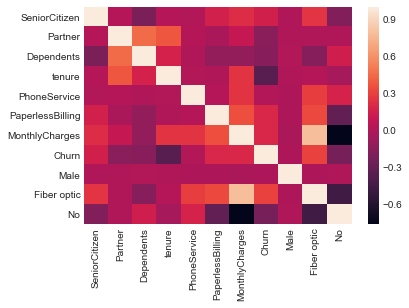

In [18]:
#To check the correlation between variables
sns.heatmap(df.corr()) 

In [19]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,Male,Fiber optic,No
0,0,1,0,1,0,1,29.85,0,0,0,0
1,0,0,0,34,1,0,56.95,0,1,0,0
2,0,0,0,2,1,1,53.85,1,1,0,0
3,0,0,0,45,0,0,42.30,0,1,0,0
4,0,0,0,2,1,1,70.70,1,0,1,0
5,0,0,0,8,1,1,99.65,1,0,1,0
6,0,0,1,22,1,1,89.10,0,1,1,0
7,0,0,0,10,0,0,29.75,0,0,0,0
8,0,1,0,28,1,1,104.80,1,0,1,0
9,0,0,1,62,1,0,56.15,0,1,0,0


# Building a Logistic Regression model

### model 1 (includes multidiverse feature)

## Train Test Split

In [20]:
X = df.ix[:,(1,2,3,4,9,10)].values
y = df.ix[:,7].values

C:\Users\Eva Chou\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\Eva Chou\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.438721
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7037
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                  0.2418
Time:                        21:12:00   Log-Likelihood:                -3089.9
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0762      0.075      1.021      0.307      -0.070       0.222
x2            -0.3885      0.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=0)

## Training data and Predicting

In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predictions = logmodel.predict(X_test)

## Evaluation

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1712
          1       0.63      0.47      0.54       613

avg / total       0.77      0.79      0.78      2325



### model2(to test if included more than one person in a house, will it cause any effect?)

## Train Test Split

In [26]:
X = df.ix[:,(0,1,2,3)].values
y = df.ix[:,7].values

In [27]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.492726
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                  0.1484
Time:                        21:12:04   Log-Likelihood:                -3470.3
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                6.043e-262
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8993      0.075     12.002      0.000       0.752       1.046
x2             0.1180      0.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=0)

## Training data and Predicting

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = logmodel.predict(X_test)

## Evaluation

In [31]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1579,  133],
       [ 427,  186]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85      1712
          1       0.58      0.30      0.40       613

avg / total       0.73      0.76      0.73      2325



### model3 (about billing part (method and amount))

## Train Test Split

In [33]:
X = df.ix[:,(5,6)].values
y = df.ix[:,7].values

In [34]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.627209
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                -0.08401
Time:                        21:12:08   Log-Likelihood:                -4417.4
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2273      0.055      4.162      0.000       0.120       0.334
x2            -0.0126      0.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=0)

## Training data and Predicting

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

## Evaluation

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      1.00      0.85      1712
          1       0.00      0.00      0.00       613

avg / total       0.54      0.74      0.62      2325



C:\Users\Eva Chou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### model 4 (includes internet service)

## Train Test Split

In [39]:
X = df.ix[:,(5,6,9,10)].values
y = df.ix[:,7].values

In [40]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495182
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                  0.1442
Time:                        21:12:12   Log-Likelihood:                -3487.6
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                1.939e-254
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5958      0.066      9.083      0.000       0.467       0.724
x2            -0.0342      0.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=0)

## Training data and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

## Evaluation

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.92      0.84      1712
          1       0.54      0.26      0.35       613

avg / total       0.71      0.75      0.71      2325



### model 5

# import data again

In [45]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Cleaning data

In [46]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Contract'] = df['Contract'].map({'Month-to-month': 'M', 'One year': 'O', 'Two year': 'T'})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})


In [47]:
#convert data to dummy variable
sex = pd.get_dummies(df['gender'],drop_first=True)
fiber = pd.get_dummies(df['InternetService'],drop_first=True)

In [48]:
df.drop(['customerID','MultipleLines','gender','InternetService','Contract','PaymentMethod',],axis=1,inplace=True)
df = pd.concat([df,sex,fiber],axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
OnlineSecurity      5517 non-null float64
OnlineBackup        5517 non-null float64
DeviceProtection    5517 non-null float64
TechSupport         5517 non-null float64
StreamingTV         5517 non-null float64
StreamingMovies     5517 non-null float64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
Male                7043 non-null uint8
Fiber optic         7043 non-null uint8
No                  7043 non-null uint8
dtypes: float64(7), int64(7), object(1), uint8(3)
memory usage: 846.1+ KB


In [50]:
#drop missing data whole row
df = df.dropna(axis=0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 7042
Data columns (total 18 columns):
SeniorCitizen       5517 non-null int64
Partner             5517 non-null int64
Dependents          5517 non-null int64
tenure              5517 non-null int64
PhoneService        5517 non-null int64
OnlineSecurity      5517 non-null float64
OnlineBackup        5517 non-null float64
DeviceProtection    5517 non-null float64
TechSupport         5517 non-null float64
StreamingTV         5517 non-null float64
StreamingMovies     5517 non-null float64
PaperlessBilling    5517 non-null int64
MonthlyCharges      5517 non-null float64
TotalCharges        5517 non-null object
Churn               5517 non-null int64
Male                5517 non-null uint8
Fiber optic         5517 non-null uint8
No                  5517 non-null uint8
dtypes: float64(7), int64(7), object(1), uint8(3)
memory usage: 705.8+ KB


In [52]:
#covert object to integer
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['TechSupport'] = df['TechSupport'].astype(int)
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['StreamingMovies'] = df['StreamingMovies'].astype(int)

In [53]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,Fiber optic,No
0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0
1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.5,0,1,0,0
2,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0
3,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0
5,0,0,0,8,1,0,0,1,0,1,1,1,99.65,820.5,1,0,1,0
6,0,0,1,22,1,0,1,0,0,1,0,1,89.10,1949.4,0,1,1,0
7,0,0,0,10,0,1,0,0,0,0,0,0,29.75,301.9,0,0,0,0
8,0,1,0,28,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,1,0
9,0,0,1,62,1,1,1,0,0,0,0,0,56.15,3487.95,0,1,0,0


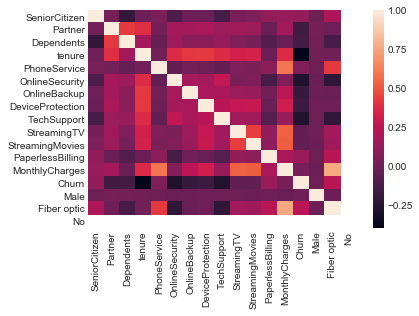

In [54]:
sns.heatmap(df.corr()) 

there are relationships in correlation between internet service

## Train Test Split

In [55]:
X = df.ix[:,(5,6,7,8,9,3)].values
y = df.ix[:,13].values

C:\Users\Eva Chou\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=0)

## Training data and Predicting

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
predictions = logmodel.predict(X_test)

## Evaluation

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

                  0.75      1.00      0.86         3
      100.2       0.00      0.00      0.00         1
      100.8       0.00      0.00      0.00         1
     1001.2       0.00      0.00      0.00         1
     1008.7       0.00      0.00      0.00         1
      101.1       0.00      0.00      0.00         0
     101.45       0.00      0.00      0.00         1
    1011.05       0.00      0.00      0.00         1
     1011.5       0.00      0.00      0.00         1
     1011.8       0.00      0.00      0.00         1
     102.45       0.00      0.00      0.00         1
      102.5       0.00      0.00      0.00         1
     1020.2       0.00      0.00      0.00         1
    1021.55       0.00      0.00      0.00         1
    1023.85       0.00      0.00      0.00         1
    1025.15       0.00      0.00      0.00         1
    1025.95       0.00      0.00      0.00         1
     1028.9       0.00      0.00      0.00   

C:\Users\Eva Chou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Eva Chou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
